# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [52]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [62]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [75]:
np.random.normal(10,2)

9.549043037607621

In [113]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=431.58362895950484, mobile=True), User(purchased=True, time_on_site=790.362674452183, mobile=True), User(purchased=True, time_on_site=879.0428962435952, mobile=False), User(purchased=False, time_on_site=586.217176323538, mobile=False), User(purchased=True, time_on_site=215.61031244320498, mobile=True), User(purchased=True, time_on_site=467.313892387257, mobile=True), User(purchased=False, time_on_site=239.75246694597575, mobile=False), User(purchased=False, time_on_site=268.0261655169296, mobile=True), User(purchased=True, time_on_site=624.4385709758608, mobile=True), User(purchased=False, time_on_site=417.13801169812086, mobile=False)]


In [134]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,431.583629,True
1,True,790.362674,True
2,True,879.042896,False
3,False,586.217176,False
4,True,215.610312,True


In [115]:
user_data['time_on_site_min'] = user_data['time_on_site']/60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,431.583629,True,7.193060
1,True,790.362674,True,13.172711
2,True,879.042896,False,14.650715
3,False,586.217176,False,9.770286
4,True,215.610312,True,3.593505


(array([  1.,  33.,  93., 229., 307., 202., 105.,  21.,   7.,   2.]),
 array([ -85.16197998,   39.28117752,  163.72433502,  288.16749251,
         412.61065001,  537.05380751,  661.49696501,  785.94012251,
         910.38328001, 1034.8264375 , 1159.269595  ]),
 <a list of 10 Patch objects>)

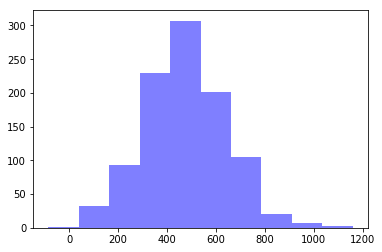

In [116]:
num_bins = 10
plt.hist(user_data['time_on_site'], num_bins, facecolor='blue', alpha=0.5)

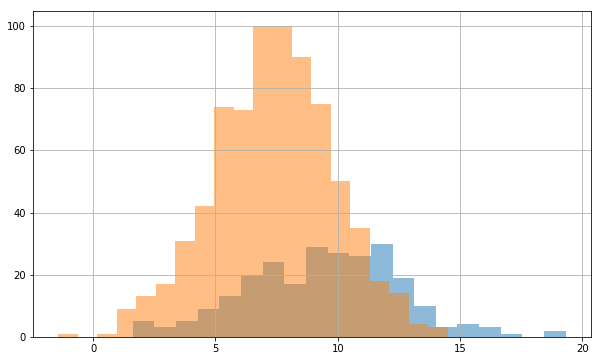

In [117]:
user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.395806383057993,5.457727420381445,6.012980358659168,6.370819673044487,6.526220869482321,6.618506115477453,6.744300972093091,6.937814523764514,7.022230321283178,7.738183255456649,...,570.7205763776294,572.579212329361,573.071762294419,577.5607756708825,578.0265919014007,578.8349054472059,584.0914381586123,586.960469433746,588.7975083689481,599.8083961016524
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,1,1
True,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [121]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='index')

purchased,False,True
time_on_site_min,,
"(-1.44, 2.729]",0.794118,0.205882
"(2.729, 6.877]",0.493789,0.506211
"(6.877, 11.025]",0.412574,0.587426
"(11.025, 15.173]",0.293651,0.706349
"(15.173, 19.321]",0.444444,0.555556


In [124]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-1.44, 2.729]",0.061785,0.012433
"(2.729, 6.877]",0.363844,0.289520
"(6.877, 11.025]",0.480549,0.531083
"(11.025, 15.173]",0.084668,0.158082
"(15.173, 19.321]",0.009153,0.008881


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased


In [128]:
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.516,0.410667
True,0.484,0.589333


In [135]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')



purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-1.44, 2.729]    0.046512  0.068182  0.000000  0.015837
(2.729, 6.877]    0.209302  0.428571  0.165289  0.323529
(6.877, 11.025]   0.503876  0.470779  0.404959  0.565611
(11.025, 15.173]  0.209302  0.032468  0.388430  0.095023
(15.173, 19.321]  0.031008  0.000000  0.041322  0.000000

## Stanford Open Police Project

In [161]:
%%time
import pandas as pd
nj_data = pd.read_csv('nj_statewide_2019_02_25.csv')



(3845334, 20)
CPU times: user 17.4 s, sys: 893 ms, total: 18.3 s
Wall time: 18.3 s


In [163]:
print(nj_data.shape)
nj_data.head()

(3845334, 20)


,raw_row_number,date,time,location,subject_race,subject_sex,officer_id_hash,department_id,type,violation,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state
0,24723,2009-01-10,15:38:41,"31ST / CARMEN, Camden City",black,male,347f40fd4d,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,SIL,Chrysler,Town & Country,NJ
1,88239,2009-02-06,11:34:36,"@division, Ewing Twp",black,female,e84e551aad,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101999,2009-02-11,01:34:26,"34TH / WESTFIELD, Camden City",black,male,e008ccd5a2,A010,vehicular,NaN,True,NaN,NaN,arrest,False,True,GRY,Chevrolet,NaN,PA
3,151289,2009-03-03,20:29:16,"MACARTHUR / 12TH, Camden City",black,male,b84c0f827e,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,BLU,Chevrolet,Tahoe,NJ
4,153223,2009-03-05,22:25:26,"FEDERAL / 10TH, Camden City",black,male,56eb37f85f,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLK,Ford,Expedition,NJ


In [160]:
nj_data.isna().sum()

raw_row_number                      0
date                                0
time                                0
location                            0
subject_race                   104302
subject_sex                     17823
officer_id_hash                     0
department_id                       0
type                                0
violation                      848829
arrest_made                   3487534
citation_issued                789434
warning_issued                 794970
outcome                        782633
frisk_performed               3475920
search_conducted              3471733
vehicle_color                   98204
vehicle_make                   136904
vehicle_model                 2699896
vehicle_registration_state      26283
dtype: int64

In [146]:
nj_data.violation.value_counts().head(10)

39:4-97 CARELESS DRIVING                          258574
39:4-98 RATES OF SPEED                            139548
39:4-88B UNSAFE LANE CHANGE                        94245
39:3-66 MAINTENANCE ILLUM DEVICE                   63439
39:3-76.2F REQ WEARING SEATBELTS                   54343
39:4-99 EXCEED SPEED LIMITATIONS                   38681
39:4-97.3 USE OF HANDS-FREE WIRELESS TELEPHONE     37143
39:4-56 DELAYING TRAFFIC                           35209
39:3-75 SAFETY GLASS DEFINED                       26805
39:3-74 WINDSHIELD WIPERS                          25290
Name: violation, dtype: int64

In [149]:
nj_data.vehicle_make.value_counts(normalize=True).head(10)

Honda         0.114136
Ford          0.113692
Chevrolet     0.093644
Toyota        0.093431
Nissan        0.080717
Dodge         0.055763
Jeep          0.037617
Hyundai       0.035805
BMW           0.029436
Volkswagen    0.028164
Name: vehicle_make, dtype: float64

In [154]:
nj_data[nj_data.violation == '39:4-98 RATES OF SPEED'].vehicle_make.value_counts(normalize=True).head(10)

Honda         0.118673
Toyota        0.104097
Ford          0.091937
Nissan        0.083173
Chevrolet     0.079074
Dodge         0.047206
BMW           0.039855
Hyundai       0.037527
Volkswagen    0.032447
Jeep          0.031736
Name: vehicle_make, dtype: float64

In [164]:
nj_data[nj_data.violation == '39:4-98 RATES OF SPEED'].vehicle_color.value_counts(normalize=True).head(10)

BLK    0.238954
SIL    0.200708
WHI    0.157833
GRY    0.110433
BLU    0.096752
RED    0.077175
GRN    0.043044
TAN    0.020111
GLD    0.019722
BGE    0.009164
Name: vehicle_color, dtype: float64

Use %%timeit to optimize code,
import tqdm

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [13]:
# Import the person.csv dataset
import pandas as pd
person_data = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv', index_col=0)
person_data.head()


,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [49]:
# Let's take a look at the data using crosstab
pd.crosstab(person_data['age'], person_data['weight'])


weight,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,...,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,233,234,236,237,238,239,240,241,242,244,246
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


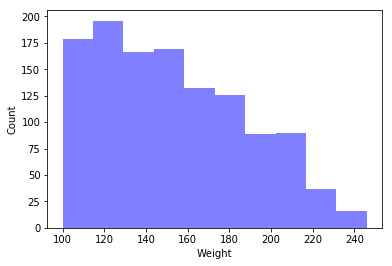

In [53]:
# Let's plot a histogram of the data to look for patterns - weight first
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 10
plt.hist(person_data['weight'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

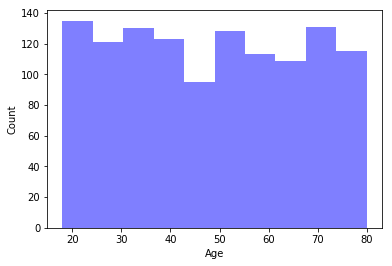

In [54]:
# Let's plot a histogram of the data to look for patterns - age next
num_bins = 10
plt.hist(person_data['age'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

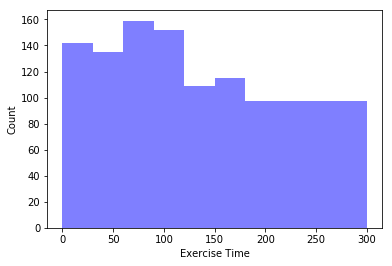

In [55]:
# Let's plot a histogram of the data to look for patterns - exercise time
num_bins = 10
plt.hist(person_data['exercise_time'], num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Exercise Time')
plt.ylabel('Count')
plt.show()

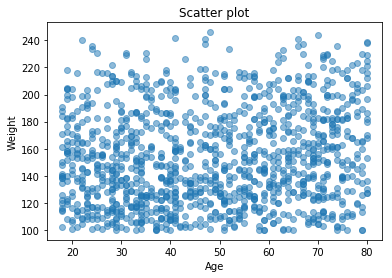

In [43]:
# A scatter plot should show if a trend exists - check age and weight
plt.scatter(person_data['age'], person_data['weight'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

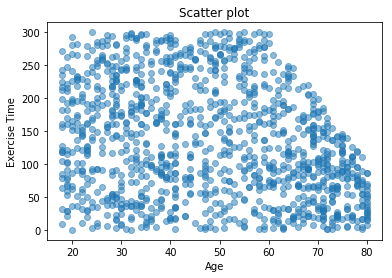

In [45]:
# A scatter plot should show if a trend exists - check age and exercise time
plt.scatter(person_data['age'], person_data['exercise_time'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Age')
plt.ylabel('Exercise Time')
plt.show()

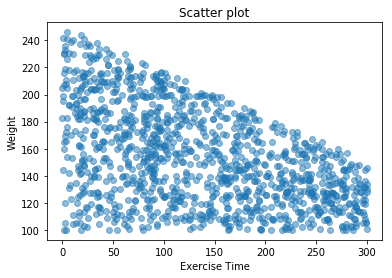

In [51]:
# A scatter plot should show if a trend exists - exercise time and weight
plt.scatter(person_data['exercise_time'], person_data['weight'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Exercise Time')
plt.ylabel('Weight')
plt.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

They are all integer data types.

2.  What are the relationships between the variables?

Age and Weight are randomly distributed, no specific relationship appears to exist.

Exercise Time does appear to decline starting around 60 years old.

Weight does appear to fall with an increase in Exercise Time.

3.  Which relationships are "real", and which spurious?

Exercise Time and Age are "real",
Weight and Exercise Time are "real",
Age and Weight are spurious


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)